In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import map_coordinates
import math


In [ ]:

def present_image(img, title, xlabel = '', ylabel = ''):
  # convert each of the RGB chnnels to the correct dynamic range:
  img = (((img-np.min(img))/np.max(img))* 255).astype(int)
  # Plot:
  plt.figure(figsize=(16,8));
  plt.imshow(img, cmap="gray");
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()


<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<title>Bilinear Interpolation</title>
</head>
<body>

<h1>Bilinear Interpolation</h1>

<p>Bilinear interpolation is a method used in image processing to interpolate values at non-integer pixel locations. It is commonly used to resize or rotate images smoothly without introducing artifacts.</p>

<h2>How Bilinear Interpolation Works</h2>

<p>When resizing an image, for example, the new pixel values need to be calculated based on the original pixel values. Bilinear interpolation achieves this by considering the nearest four pixels surrounding the target location.</p>

<p>Let's say we want to calculate the value of a pixel at a non-integer location (x, y). Bilinear interpolation first finds the four nearest pixels (p1, p2, p3, p4) with integer coordinates around (x, y).</p>

<p>It then calculates the weighted average of these four pixels based on their distances from (x, y). The closer a pixel is to the target location, the more influence it has on the interpolated value.</p>

<p>The formula for bilinear interpolation is:</p>

<pre>
   V = (1 - dx) * (1 - dy) * p1 +
       dx * (1 - dy) * p2 +
       (1 - dx) * dy * p3 +
       dx * dy * p4
</pre>

<p>Where:</p>
<ul>
  <li>V is the interpolated value at location (x, y).</li>
  <li>dx and dy are the fractional parts of (x, y).</li>
  <li>p1, p2, p3, and p4 are the values of the four nearest pixels.</li>
</ul>

<h2>Applications of Bilinear Interpolation</h2>

<p>Bilinear interpolation is commonly used in:</p>
<ul>
  <li>Image resizing</li>
  <li>Image rotation</li>
  <li>Geographic information systems (GIS)</li>
  <li>Computer graphics</li>
</ul>

<p>It helps in achieving smooth and visually appealing transformations of images and data.</p>

</body>
</html>


In [ ]:
def bilinear_interpolation_shift(image, dx, dy):
    # Get input image shape
    height, width = image.shape[:2]

    # Generate grid of coordinates
    grid_x, grid_y = np.meshgrid(np.arange(width), np.arange(height))

    # Calculate new coordinates based on displacement
    new_x = grid_x + dx * width
    new_y = grid_y + dy * height

    # Perform bilinear interpolation
    new_image = map_coordinates(image, [new_y, new_x], order=1, mode='constant')

    return new_image.reshape(image.shape)





In [ ]:

img = cv2.imread('./imgs/cameraman.jpg',cv2.IMREAD_GRAYSCALE)
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(img, cmap="gray")

dx, dy = 0.2, 0.1
new_image = bilinear_interpolation_shift(img, dx, dy)
plt.subplot(1,2,2)
plt.title(f'bilinear_interpolation_shift with dx={dx}, dy={dy}')
plt.imshow(new_image, cmap="gray")
plt.show()

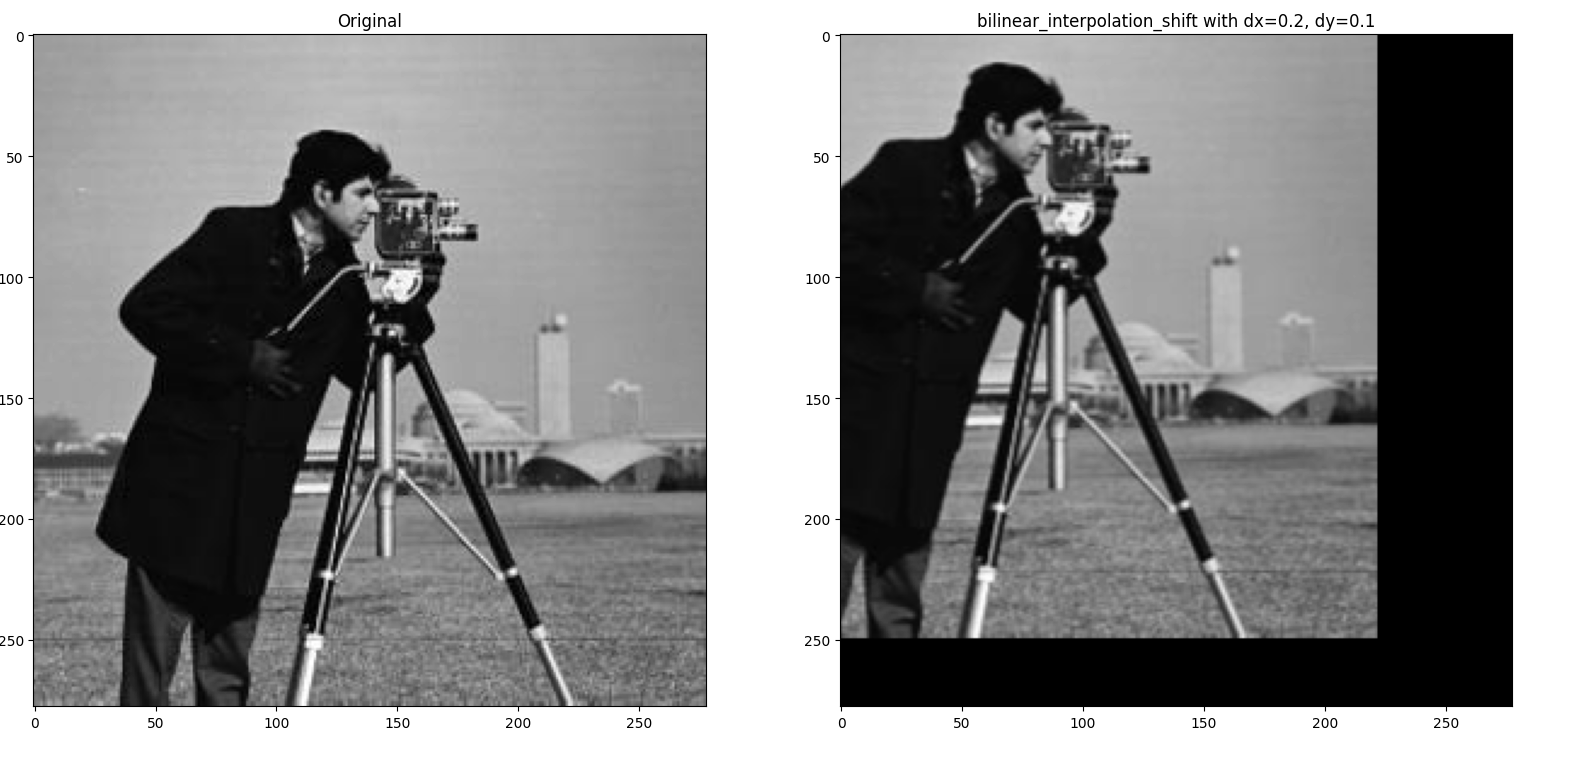

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<title>Shift Image Function</title>
</head>
<body>

<h1>Shift Image Function</h1>

<p>A function that shifts the image by any non-integer index [dx, dy] (not necessarily in the range [0, 1]).</p>

</body>
</html>


In [ ]:
def bilinear_interpolation_shift(image, dx, dy):
   
    # Get input image shape
    height, width = image.shape[:2]
    
    if dx >= 1:
      dx = dx/width 
    if dy >= 1:
      dy = dy/height
    # Generate grid of coordinates
    grid_x, grid_y = np.meshgrid(np.arange(width), np.arange(height))

    # Calculate new coordinates based on displacement
    new_x = grid_x + dx * width
    new_y = grid_y + dy * height

    # Perform bilinear interpolation
    new_image = map_coordinates(image, [new_y, new_x], order=1, mode='constant')

    return new_image.reshape(image.shape)




In [ ]:

img = cv2.imread('./imgs/cameraman.jpg',cv2.IMREAD_GRAYSCALE)
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(img, cmap="gray")

dx, dy = 20, 10
new_image = bilinear_interpolation_shift(img, dx, dy)
plt.subplot(1,2,2)
plt.title(f'bilinear_interpolation_shift with dx={dx}, dy={dy}')
plt.imshow(new_image, cmap="gray")
plt.show()

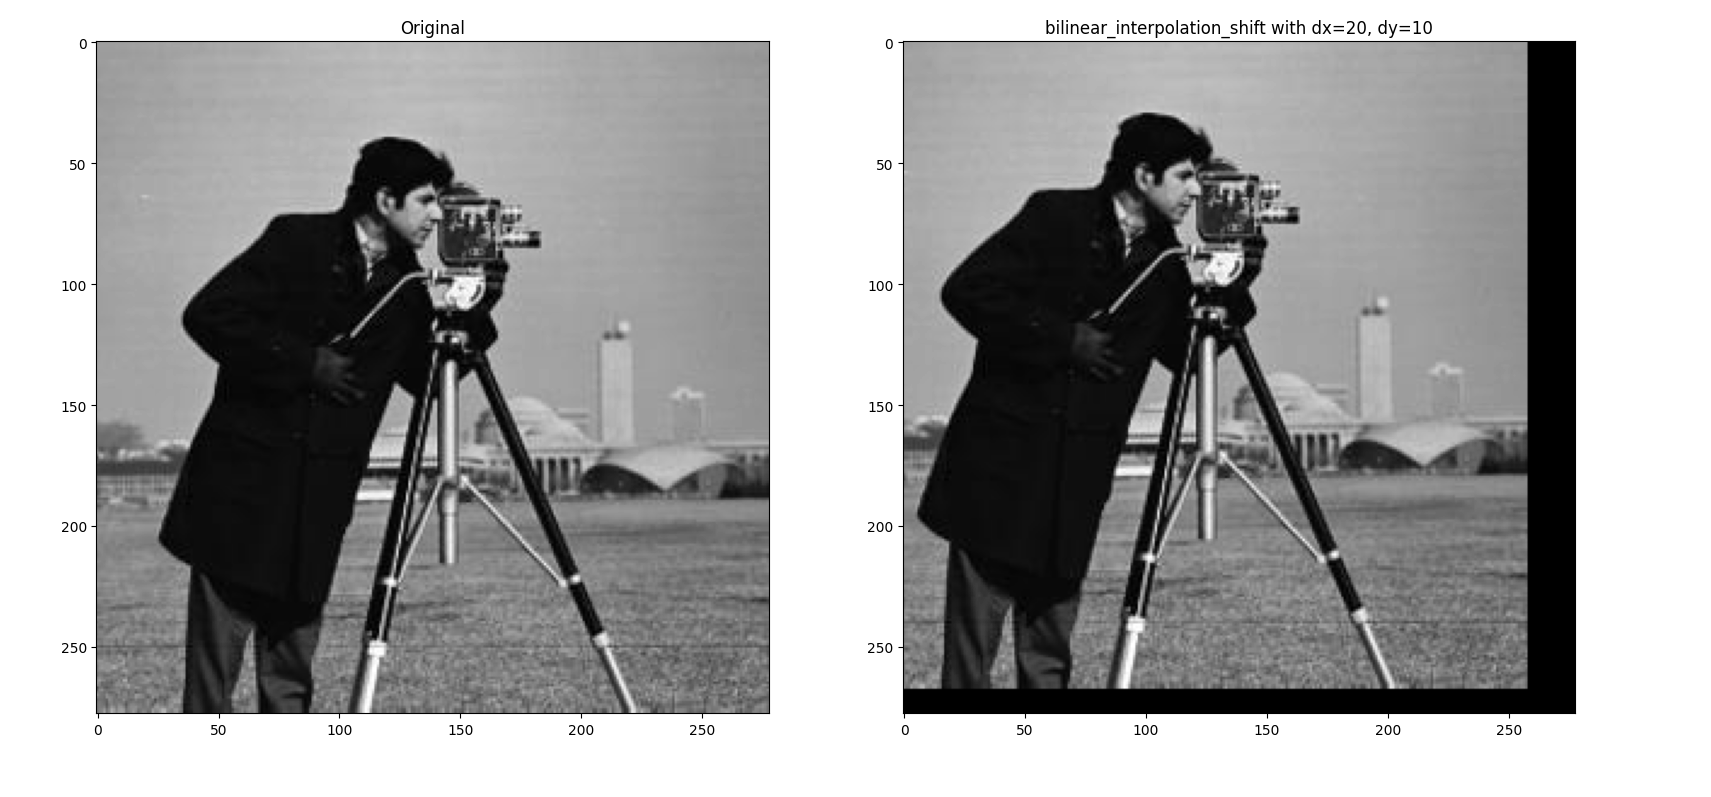

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<title>Creating and Displaying Mask</title>
</head>
<body>

<h1>Creating and Displaying Mask</h1>

<p>Create a mask containing the value 1 inside and the value 0 outside. The mask will be in the shape of a semicircle below the face of the figure. Name this mask mask1 and display it.</p>

<canvas id="maskCanvas"></canvas>

</body>
</html>


In [ ]:
# Load the image
img = cv2.imread('./imgs/Brad.jpg', cv2.IMREAD_GRAYSCALE)

# Create a mask of zeros with the same shape as the image
mask1 = np.zeros_like(img)

# Get the height and width of the image
height, width = mask1.shape

# Define the center and radius of the semicircle
center = (width // 2, height)
radius = width // 2

# Create a semicircular mask
for y in range(height):
    for x in range(width):
        if (x - center[0])**2 + (y - center[1])**2 <= radius**2:
            mask1[y, x] = 1

# Display the mask
plt.imshow(mask1, cmap='gray')
plt.title('Mask 1')
plt.show()


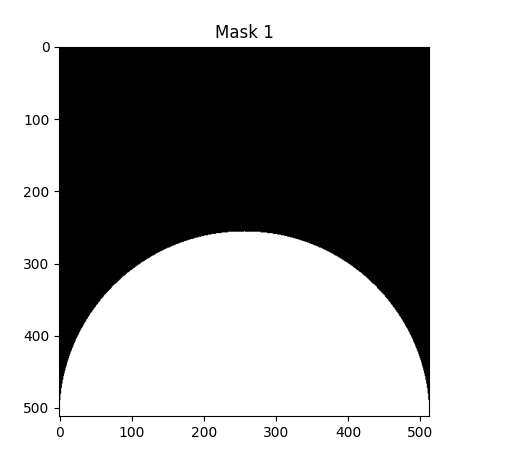

In [ ]:
new_img = np.zeros(img.shape)

for x in range(mask1.shape[0]):
  for y in range(mask1.shape[1]):
    if mask1[x, y] == 1:
      new_img[x,y] = img[x,y]
    else:
      new_img[x,y] = 0

plt.imshow(new_img, cmap='gray')
plt.title('brad_win')
plt.show()

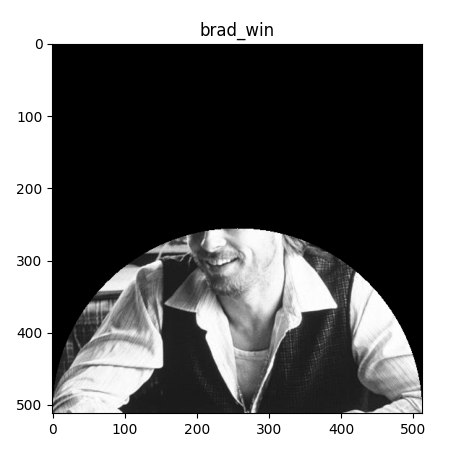